# Import The Packeges 

In [129]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error , plot_confusion_matrix
import matplotlib.pyplot as plt
import datetime as dt
import time
from math import sqrt

# Load The Dataset

In [130]:
data = pd.read_csv('earthquakes.csv')
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [131]:
data.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


### Column of dataset

In [132]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

### Information about dataset

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

# Data Cleaning

# missing value of all dataset

In [134]:
missing_value_count = data.isnull().sum()
missing_value_count

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [135]:
# rows * columns = all cells 
total_cell = np.product(data.shape) 

# calculating all missing cells 
total_missing_value = missing_value_count.sum() 
print(f"total cells is {total_cell} total missing cells is {total_missing_value}")

total cells is 491652 total missing cells is 145439


# Percent of missing value

In [136]:
# we'll calculate the percentage of missing value in our dataset  
percent_of_missing_value = (total_missing_value/total_cell) * 100

print(f"percent of missing value {percent_of_missing_value} %")


percent of missing value 29.581695996355144 %


# Calculate the missing value of Magnitude

In [137]:
percent_of_missing_value_magnitude_error =(data['Magnitude Error'].isnull().sum() /data.shape[0]) *100

print(f"percent of missing value {percent_of_missing_value_magnitude_error} %")


percent of missing value 98.60328036904151 %


Almost 30% of cells in this dataset are empty and 98% record of column Magnitude Error is NaN

### Figure out why the data is missing
Is this value missing becuase it wasn't recorded or becuase it dosen't exist (cannot be recorded)?



In [138]:
missing_value_count

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

# Percent of Missing Value in Dataset

In [139]:
df = data

Missing Value Percentage 

percent of Depth Error is 80.94566888774986
percent of Depth Seismic Stations is 69.68648556295916
percent of Magnitude Error is 98.60328036904151
percent of Magnitude Seismic Stations is 89.04835127285153
percent of Azimuthal Gap is 68.82368016401846
percent of Horizontal Distance is 93.14881257474799
percent of Horizontal Error is 95.06236118229967


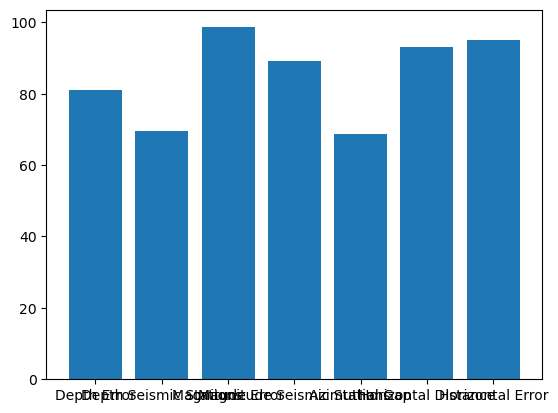

In [140]:
print("Missing Value Percentage \n")

columns = []
percentages = []

for column in df.columns:
    percentage = (df[column].isnull().sum() /df.shape[0]) * 100
    if percentage >30:
        columns.append(column)
        percentages.append(percentage)
        print(f"percent of {column} is {percentage}")

plt.bar(x=columns , height=percentages )
plt.show()

## Should we drop the columns they have more than 50 % ?

this is depend of the importance of the column it self ?                            
we will drop these columns because more than 50% of theme are empty  and we don't nedd them for our model, 
we just need the (Date , Time , Latitude , Longitude , Depth , Magnitude , Type )

In [141]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Droping the unnecessary columns 

In [142]:
list_of_columns = ['Depth Error' , 'Depth Seismic Stations' , 'Magnitude Error' ,
                    'Magnitude Seismic Stations' , 'Azimuthal Gap' , 'Horizontal Distance' ,
                    'Horizontal Error' , 'ID' , 'Root Mean Square' ,
                    'Source' , 'Location Source' , 'Magnitude Source' , 'Magnitude Type' ,
                    'Status' ]

df_dropped_NaN = df.drop(list_of_columns , axis=1)
df_dropped_NaN.head()


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8


In [143]:
#cheaking for NaN value in new dataset
df_dropped_NaN.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Type         0
Depth        0
Magnitude    0
dtype: int64

### now our dataset has no Nan values 

In [144]:
df_dropped_NaN.nunique()

Date         12401
Time         20472
Latitude     20676
Longitude    21474
Type             4
Depth         3485
Magnitude       64
dtype: int64

## We'll take Only The Earthquake type 

our model we'll predict only the normal earthquakes (Without external factors like Nuclear Explosion, Explosion, Rock Burst )

In [145]:
df_dropped_NaN.Type.unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [146]:
#delet all the other type except the Earthquake type because that's all we need 
df_dropped_NaN = df_dropped_NaN[df_dropped_NaN.Type == 'Earthquake'] 
df_dropped_NaN = df_dropped_NaN.drop('Type' , axis=1)
df_dropped_NaN

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.2460,145.6160,131.60,6.0
1,01/04/1965,11:29:49,1.8630,127.3520,80.00,5.8
2,01/05/1965,18:05:58,-20.5790,-173.9720,20.00,6.2
3,01/08/1965,18:49:43,-59.0760,-23.5570,15.00,5.8
4,01/09/1965,13:32:50,11.9380,126.4270,15.00,5.8
...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6
23408,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3


In [147]:
df_dropped_NaN.head()


,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [148]:
df_dropped_NaN.tail()

,Date,Time,Latitude,Longitude,Depth,Magnitude
23407,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6
23408,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3
23411,12/30/2016,20:08:28,37.3973,141.4103,11.94,5.5


In [149]:
df_dropped_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23232 entries, 0 to 23411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23232 non-null  object 
 1   Time       23232 non-null  object 
 2   Latitude   23232 non-null  float64
 3   Longitude  23232 non-null  float64
 4   Depth      23232 non-null  float64
 5   Magnitude  23232 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


# Normalize Numirical Data

## Make The Date 

In [150]:
numirical_colummns = ['Latitude' , 'Longitude' , 'Depth']
# df_dropped_NaN['Date'] = pd.to_datetime(df_dropped_NaN['Date'])
# df_dropped_NaN['Date'] = df_dropped_NaN['Date'].map(dt.datetime.toordinal)

#df_dropped_NaN['Time'] = pd.to_datetime(df_dropped_NaN.Time, format="%Y-%M-%")
#df_dropped_NaN['Time'] = df_dropped_NaN['Time'].apply(lambda  var: time.mktime(var.timetuple()))
final_df = df_dropped_NaN

import datetime
import time

timestamp = []
for d, t in zip(final_df['Date'], final_df['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')


timeStamp = pd.Series(timestamp)
final_df['Timestamp'] = timeStamp.values
final_df = final_df.drop(['Date', 'Time'], axis=1)
final_df = final_df[final_df.Timestamp != 'ValueError']
final_df.head()



,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


# Creating The Model

## Spliting The Data Into X and Y

In [151]:
attribute_columns = ['Timestamp'  , 'Latitude' , 'Longitude' , ]
target_columns = [ 'Depth' , 'Magnitude']

X = final_df.drop(target_columns, axis=1)
y = final_df.drop(attribute_columns, axis=1)

In [152]:
X.head()

,Latitude,Longitude,Timestamp
0,19.246,145.616,-157630542.0
1,1.863,127.352,-157465811.0
2,-20.579,-173.972,-157355642.0
3,-59.076,-23.557,-157093817.0
4,11.938,126.427,-157026430.0


### A Test Cell delet it Later 

In [153]:

#type(X.Date[1]), dt.datetime.toordinal(pd.to_datetime(X.Date[1])) , X.Date[1] , dt.date.fromordinal(dt.datetime.toordinal(pd.to_datetime(X.Date[1])))

In [154]:
y.head()

,Depth,Magnitude
0,131.6,6.0
1,80.0,5.8
2,20.0,6.2
3,15.0,5.8
4,15.0,5.8


## Spliting Dataset Into Train and Test Set

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42) 

## Train The Linear Regression model

In [156]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

## Testing The Model

In [157]:
predicted_y = linear_model.predict(X_test)
predicted_y


array([[74.06893011,  5.87990035],
       [70.70681281,  5.85608466],
       [52.20615764,  5.90606473],
       ...,
       [66.9586519 ,  5.90617256],
       [67.05243485,  5.91792266],
       [60.94865999,  5.87367085]])

In [158]:
# plot the 
#print("Coefficients: \n", linear_model.coef_)
meanAbsolutError = mean_absolute_error(y_test , predicted_y)
meanSquaredError = mean_squared_error(y_test , predicted_y)
rootMeanSquaredError = sqrt(meanSquaredError)
rsquared = r2_score(y_test, predicted_y)
score = linear_model.score(X_test , y_test)

print(f"Mean Absolute Error: {meanAbsolutError}")
print(f"Mean Squared Error: {meanSquaredError}")
print(f"Root Mean Squared Error: {rootMeanSquaredError}")
print(f"R-squared: {rsquared}")
print(f"score: {score}")





Mean Absolute Error: 34.697381430971845
Mean Squared Error: 7120.147688170514
Root Mean Squared Error: 84.38096757071771
R-squared: 0.01051547973079292
score: 0.01051547973079292


### as we can see we have score 0.01 which is not good at all (less than 1 %) ,
### but we see that the other messeur close to 0  which is good 